In [1]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import functions as f

### 1. Load Data

In [3]:
df91, df01 = f.load_data()

### 2. Process Data

In [4]:
pdf91 = f.process_and_save_data(df91, ['UniqueCarrier', 'Origin', 'Dest'],['Month','DayofMonth','DayOfWeek','DepTime','FlightNum','ActualElapsedTime','DepDelay','Distance','Cancelled','Diverted'], 'Data/pdf91.csv')

In [5]:
pdf01 = f.process_and_save_data(df01, ['UniqueCarrier','TailNum' ,'Origin', 'Dest'],['Month','DayofMonth','DayOfWeek','DepTime','FlightNum','ActualElapsedTime','DepDelay','Distance','TaxiIn','TaxiOut','Cancelled','Diverted'], 'Data/pdf01.csv')

### 3. Modeling

#### 3.1 Decision Tree

In [6]:
dt91, acc_dt91 = f.train_dt(pdf91)
dt01, acc_dt01 = f.train_dt(pdf01)

#### 3.1 XG Boost

In [7]:
xgb91, acc_xgb91 = f.train_xgb(pdf91)
xgb01, acc_xgb01 = f.train_xgb(pdf01)

In [8]:
pd.DataFrame({
    'Model': ['Decision Tree', 'XGBoost'],
    'Year 91': [acc_dt91, acc_xgb91],
    'Year 01': [acc_dt01, acc_xgb01]
}).to_csv('Data/accuracies.csv')

### 4. Results


#### 4.1 Accuracies

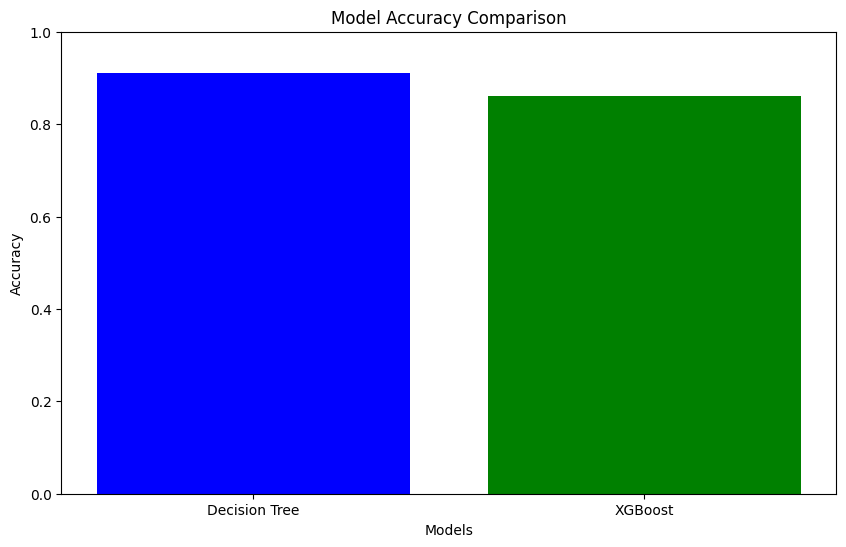

In [9]:
f.plot_model_accuracy([acc_dt91,acc_xgb91])

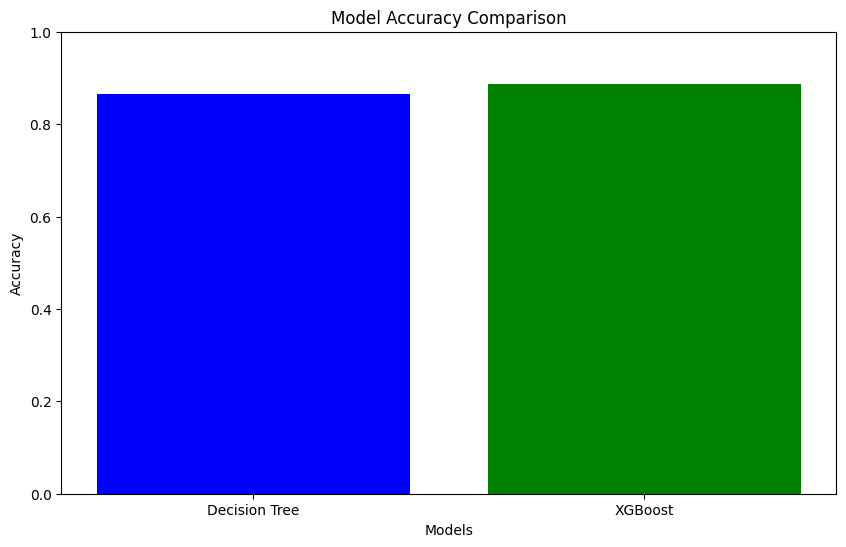

In [10]:
f.plot_model_accuracy([acc_dt01,acc_xgb01])

#### 4.2 Feature Importance

In [11]:
dt_feature_importance_91 = f.analyze_dt_features(dt91, pdf91)

In [12]:
xgb_feature_importance_91 = f.analyze_xgb_features(xgb91, pdf91)

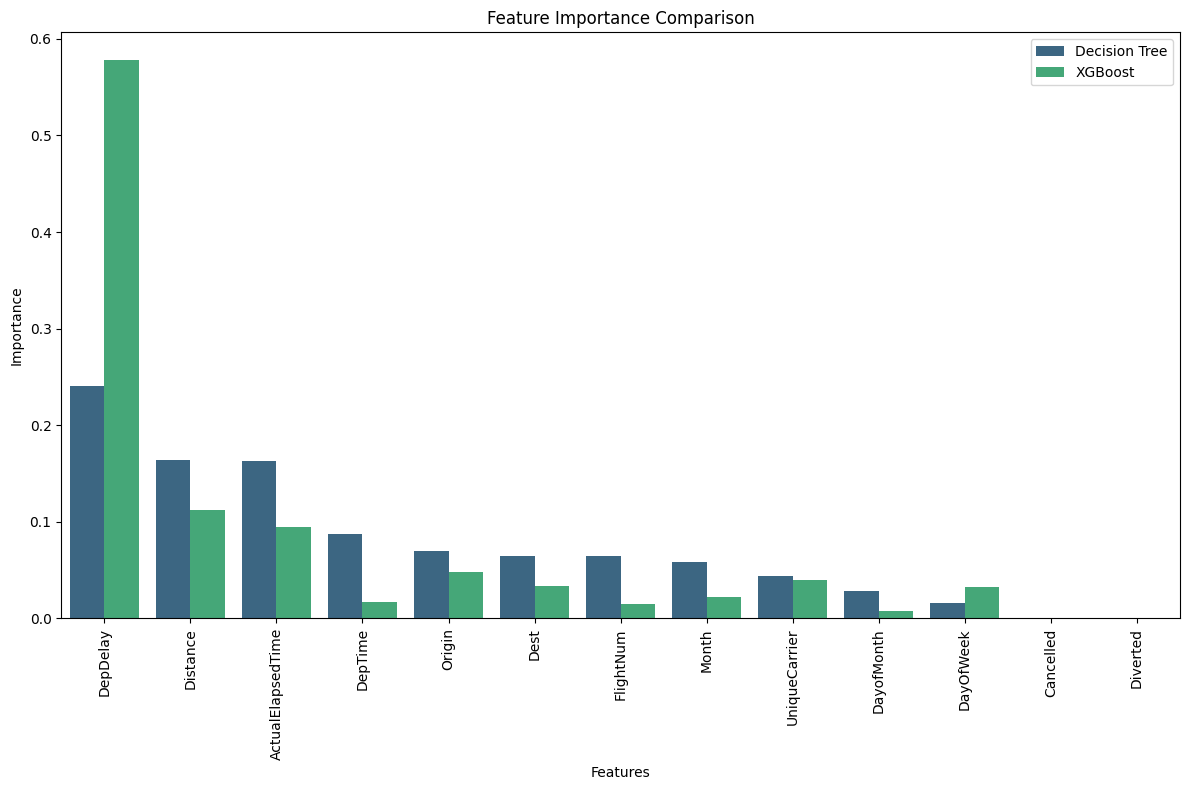

In [13]:
combined_feature_importance = f.combine_feature_importance_dfs(dt_feature_importance_91, xgb_feature_importance_91)

f.plot_feature_importance(combined_feature_importance)

In [14]:
combined_feature_importance.to_csv('Data/features_importance_91.csv')

In [15]:
dt_feature_importance_01 = f.analyze_dt_features(dt01, pdf01)

In [16]:
xgb_feature_importance_01 = f.analyze_xgb_features(xgb01, pdf01)

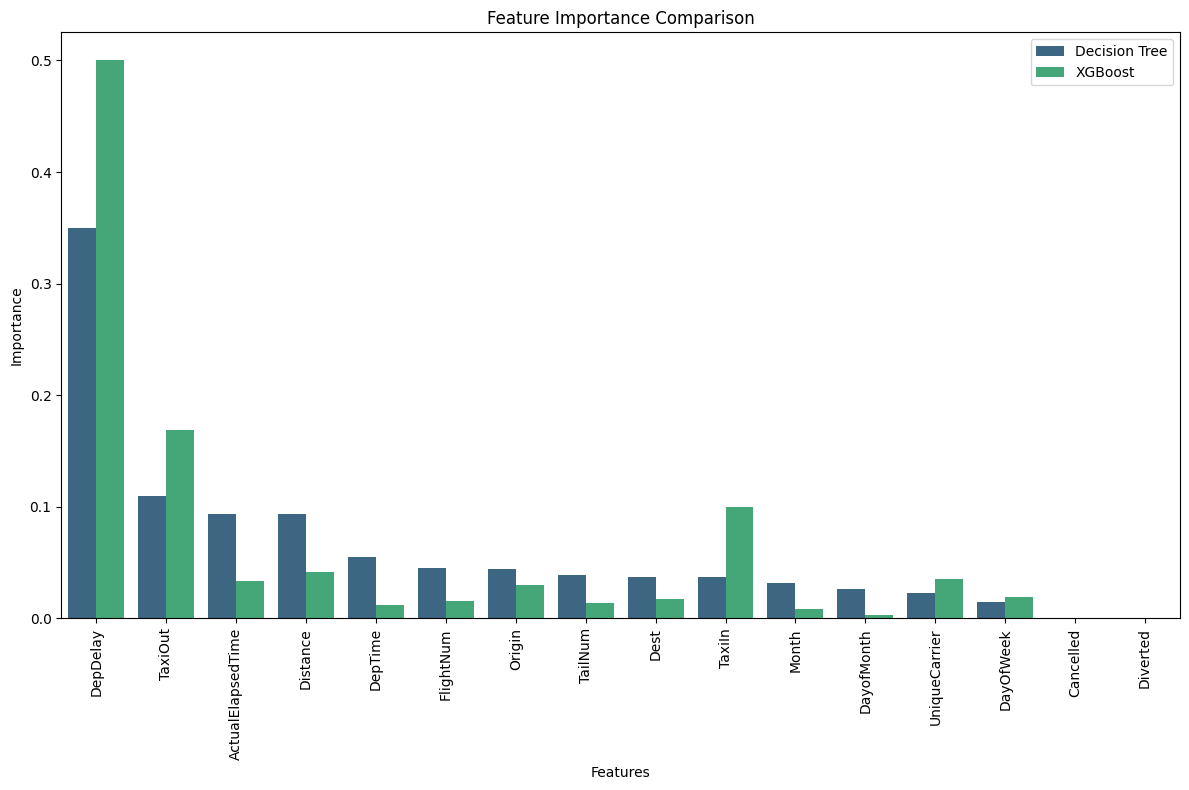

In [17]:
combined_feature_importance = f.combine_feature_importance_dfs(dt_feature_importance_01, xgb_feature_importance_01)

f.plot_feature_importance(combined_feature_importance)

In [18]:
combined_feature_importance.to_csv('Data/features_importance_01.csv')